In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("resumen_gastos.csv")
df = df.set_index(df.columns[0])
df

,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,indefinido,...,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones,Total
Mes,,,,,,,,,,,,,,,,,,,,,
Oct-2012,20.0,68.43,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,78.43
Nov-2012,170.0,254.80,20.00,58.95,333.23,276.00,89.53,232.84,70.28,1740.80,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4028.89
Dec-2012,580.0,167.13,1400.00,0.00,83.42,0.00,89.53,626.23,0.00,129.55,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4001.76
Jan-2013,100.0,168.60,30.70,83.73,175.55,0.00,89.53,391.25,44.65,499.44,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,3950.21
Feb-2013,80.0,232.84,676.60,270.47,562.75,0.00,89.53,313.01,111.20,100.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4047.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jun-2023,80.0,265.69,2768.20,106.47,226.20,1284.00,0.00,795.51,72.60,171.00,...,0.0,119.53,0.00,31.74,17.88,0.0,50.0,0.0,130.0,9964.94
Jul-2023,0.0,201.80,1748.95,165.20,272.33,278.47,0.00,534.93,72.01,1593.75,...,0.0,188.29,5.48,29.40,585.00,0.0,50.0,0.0,130.0,15641.48
Aug-2023,240.0,563.48,2462.05,120.98,359.02,0.00,0.00,689.54,72.48,264.48,...,0.0,119.53,0.00,58.30,0.00,0.0,50.0,0.0,0.0,13314.35


In [3]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,indefinido,...,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones,Total
Mes,,,,,,,,,,,,,,,,,,,,,
Oct-2012,20.0,68.43,10.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.43
Nov-2012,170.0,254.80,20.0,58.95,333.23,276.0,89.53,232.84,70.28,1740.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4028.89


IndexError: index 6 is out of bounds for axis 0 with size 6

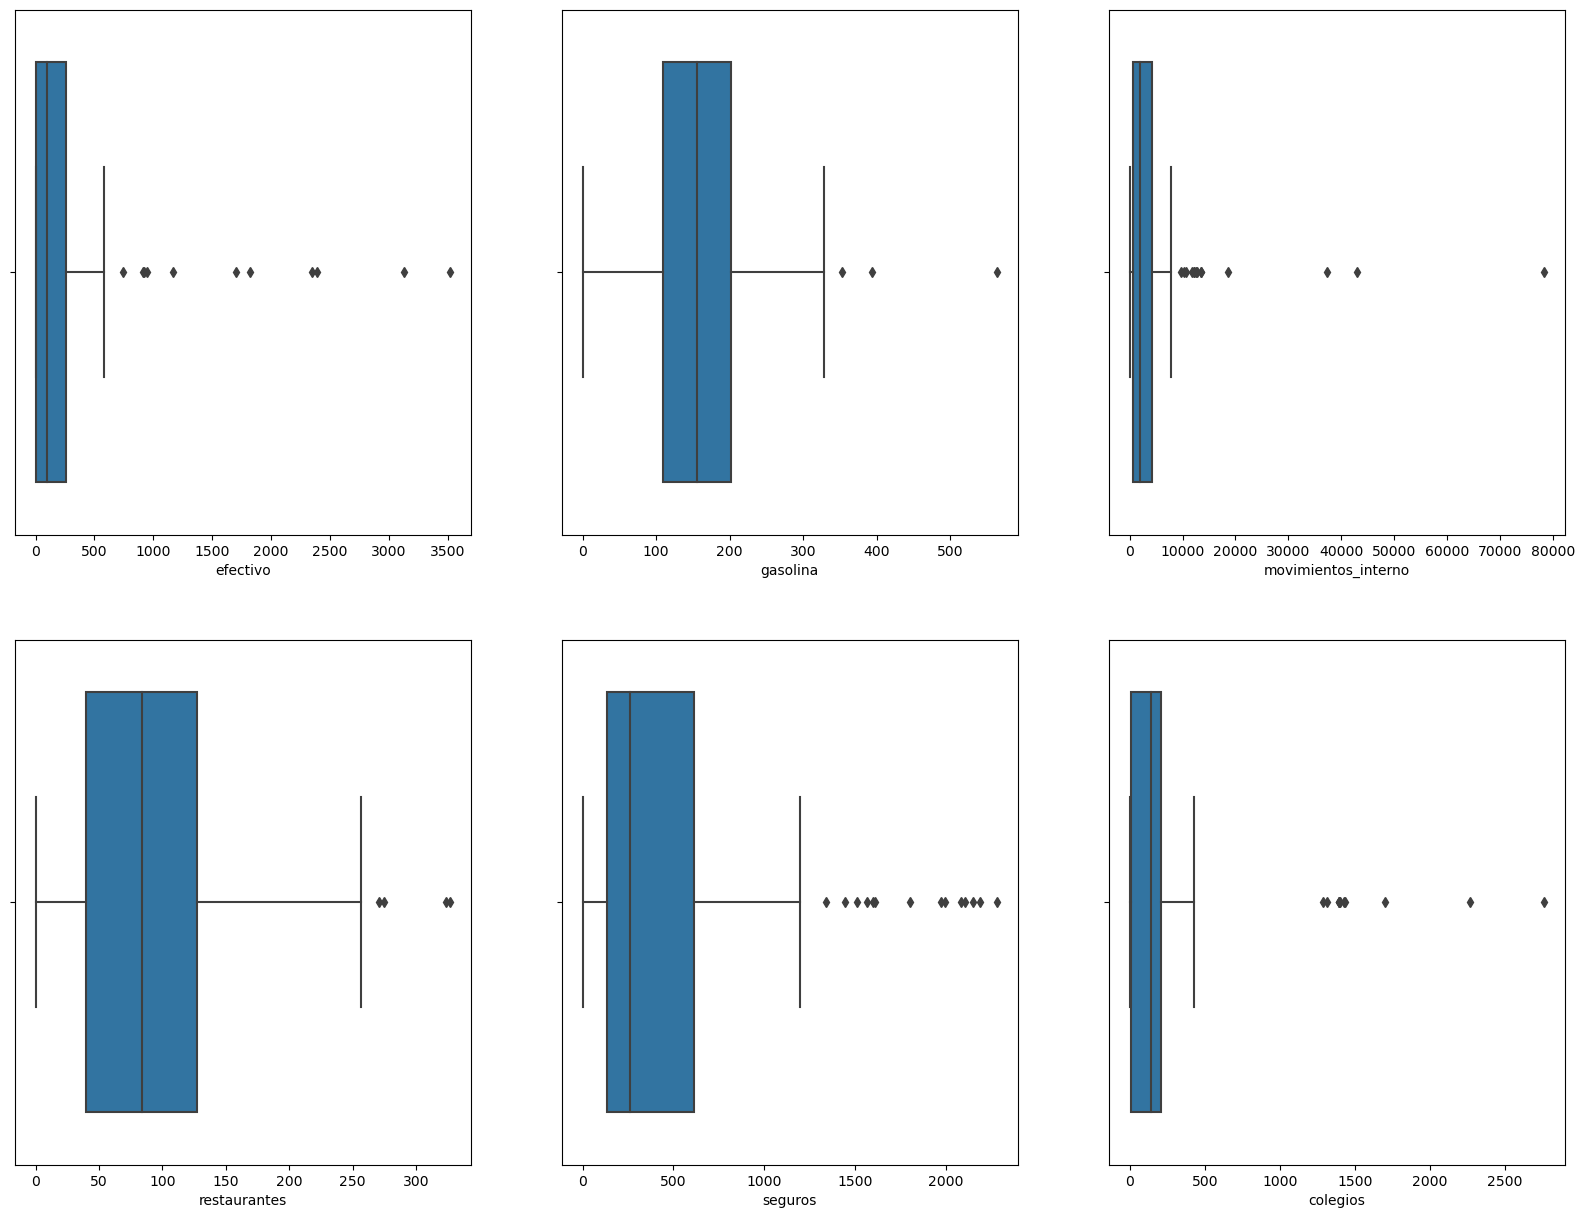

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])
plt.show()

In [5]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [6]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['efectivo', 'gasolina', 'movimientos_interno', 'restaurantes',
       'seguros', 'colegios', 'gym', 'comida', 'movil_internet', 'indefinido',
       'parking', 'casa', 'ong', 'terapiasOli', 'agua', 'farmacia',
       'pago_con_tarjeta', 'energia', 'moda', 'belleza',
       'Transferencia emitida periódica', 'gastos_varios', 'tarjetas',
       'gastos_compras', 'coches', 'ahorro', 'Moda', 'Gastos/ingreso_valen',
       'Alquiler', 'hipoteca', 'impuestos', 'limpieza', 'viajes', 'ocio',
       'Gastos/ingreso_oli', 'MJ', 'loteria', 'coche', 'oposiciones', 'Total'],
      dtype='object')

In [7]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'efectivo': ['Jun-2013', 'Aug-2013', 'Sep-2013', 'Nov-2015', 'May-2017', 'Jun-2017', 'Sep-2017', 'Oct-2017', 'Feb-2019', 'Jul-2019', 'Jul-2020'], 'gasolina': ['Jun-2014', 'Jul-2020', 'Aug-2023'], 'movimientos_interno': ['Jul-2015', 'Dec-2015', 'Jan-2016', 'Jun-2017', 'Dec-2017', 'Jan-2018', 'Mar-2018', 'Jun-2018', 'Jan-2019', 'Apr-2020', 'Oct-2020', 'Sep-2021', 'Apr-2023', 'Oct-2023'], 'restaurantes': ['Feb-2013', 'Aug-2015', 'Nov-2018', 'Mar-2022'], 'seguros': ['Jan-2014', 'Feb-2014', 'Jan-2015', 'Jan-2016', 'Jan-2017', 'Sep-2017', 'Jan-2018', 'Jan-2019', 'Oct-2019', 'Jan-2020', 'Oct-2020', 'Jan-2021', 'Jan-2022', 'Jan-2023'], 'colegios': ['Sep-2022', 'Oct-2022', 'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023', 'Jun-2023', 'Sep-2023'], 'gym': ['Nov-2018', 'Mar-2022', 'Apr-2022'], 'comida': ['Apr-2020', 'May-2020', 'Jun-2020'], 'movil_internet': ['Aug-2017', 'Nov-2017', 'Aug-2018'], 'indefinido': ['Aug-2013', 'Dec-2013', 'Nov-2015', 'May-2017', 'Sep-

In [8]:
 #sacamos los valores de nuestro diccionario. 
valores = list(ind.values())

# pero ojo!! Esto es una lista de listas, por lo que necesitaremos aplanarla, ya que el método drop acepta listas.
print(valores)

[['Jun-2013', 'Aug-2013', 'Sep-2013', 'Nov-2015', 'May-2017', 'Jun-2017', 'Sep-2017', 'Oct-2017', 'Feb-2019', 'Jul-2019', 'Jul-2020'], ['Jun-2014', 'Jul-2020', 'Aug-2023'], ['Jul-2015', 'Dec-2015', 'Jan-2016', 'Jun-2017', 'Dec-2017', 'Jan-2018', 'Mar-2018', 'Jun-2018', 'Jan-2019', 'Apr-2020', 'Oct-2020', 'Sep-2021', 'Apr-2023', 'Oct-2023'], ['Feb-2013', 'Aug-2015', 'Nov-2018', 'Mar-2022'], ['Jan-2014', 'Feb-2014', 'Jan-2015', 'Jan-2016', 'Jan-2017', 'Sep-2017', 'Jan-2018', 'Jan-2019', 'Oct-2019', 'Jan-2020', 'Oct-2020', 'Jan-2021', 'Jan-2022', 'Jan-2023'], ['Sep-2022', 'Oct-2022', 'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023', 'Jun-2023', 'Sep-2023'], ['Nov-2018', 'Mar-2022', 'Apr-2022'], ['Apr-2020', 'May-2020', 'Jun-2020'], ['Aug-2017', 'Nov-2017', 'Aug-2018'], ['Aug-2013', 'Dec-2013', 'Nov-2015', 'May-2017', 'Sep-2017', 'Jan-2018', 'Feb-2018', 'Mar-2018', 'Apr-2018', 'Jun-2018', 'Jul-2018', 'Jul-2021'], ['Nov-2012', 'Jan-2013', 'Feb-2013', 'Apr-2

In [9]:

valores = [indice for sublista in valores for indice in sublista]
valores = set(valores)
print(valores)

{'Jul-2018', 'Feb-2023', 'Apr-2023', 'Sep-2021', 'Apr-2019', 'Mar-2014', 'Apr-2016', 'Dec-2022', 'Oct-2012', 'Aug-2013', 'Jan-2013', 'May-2018', 'Feb-2014', 'Dec-2015', 'Oct-2013', 'Oct-2015', 'Oct-2020', 'Dec-2019', 'May-2015', 'Jun-2022', 'Jul-2020', 'Jul-2019', 'Jul-2017', 'Aug-2021', 'Jan-2016', 'Jul-2023', 'Feb-2022', 'Oct-2017', 'Jan-2014', 'Jun-2015', 'Nov-2013', 'Jan-2019', 'Aug-2022', 'May-2023', 'Mar-2017', 'Apr-2020', 'Dec-2013', 'Jul-2013', 'Nov-2012', 'Aug-2015', 'Mar-2021', 'Sep-2014', 'Jan-2020', 'Jan-2017', 'Apr-2021', 'Dec-2014', 'Jun-2021', 'Jun-2017', 'Aug-2014', 'Mar-2022', 'Nov-2014', 'May-2014', 'Dec-2017', 'Jul-2016', 'Feb-2013', 'Oct-2014', 'May-2022', 'Mar-2019', 'Mar-2018', 'Jul-2015', 'Aug-2023', 'Feb-2020', 'Mar-2015', 'Nov-2017', 'Jan-2023', 'Jun-2023', 'Sep-2019', 'May-2016', 'Mar-2023', 'Nov-2019', 'Oct-2022', 'Feb-2021', 'Jan-2021', 'Nov-2022', 'Apr-2018', 'Nov-2018', 'Oct-2019', 'Oct-2018', 'Sep-2015', 'Feb-2018', 'Aug-2018', 'Mar-2013', 'Oct-2023', 'Fe

In [10]:
df.shape

(131, 40)

In [11]:
# nos hacems¡os una copia del dataframe original
df_sin_outliers2 = df.copy()

# eliminamos usando la lista de índices las filas que hemos identificado como outliers. 
final = df_sin_outliers2.drop(df_sin_outliers2.index[list(valores)] )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
final.shape

In [12]:
final

NameError: name 'final' is not defined

In [13]:
print(ind)

{'efectivo': ['Jun-2013', 'Aug-2013', 'Sep-2013', 'Nov-2015', 'May-2017', 'Jun-2017', 'Sep-2017', 'Oct-2017', 'Feb-2019', 'Jul-2019', 'Jul-2020'], 'gasolina': ['Jun-2014', 'Jul-2020', 'Aug-2023'], 'movimientos_interno': ['Jul-2015', 'Dec-2015', 'Jan-2016', 'Jun-2017', 'Dec-2017', 'Jan-2018', 'Mar-2018', 'Jun-2018', 'Jan-2019', 'Apr-2020', 'Oct-2020', 'Sep-2021', 'Apr-2023', 'Oct-2023'], 'restaurantes': ['Feb-2013', 'Aug-2015', 'Nov-2018', 'Mar-2022'], 'seguros': ['Jan-2014', 'Feb-2014', 'Jan-2015', 'Jan-2016', 'Jan-2017', 'Sep-2017', 'Jan-2018', 'Jan-2019', 'Oct-2019', 'Jan-2020', 'Oct-2020', 'Jan-2021', 'Jan-2022', 'Jan-2023'], 'colegios': ['Sep-2022', 'Oct-2022', 'Nov-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023', 'Jun-2023', 'Sep-2023'], 'gym': ['Nov-2018', 'Mar-2022', 'Apr-2022'], 'comida': ['Apr-2020', 'May-2020', 'Jun-2020'], 'movil_internet': ['Aug-2017', 'Nov-2017', 'Aug-2018'], 'indefinido': ['Aug-2013', 'Dec-2013', 'Nov-2015', 'May-2017', 'Sep-

In [14]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    if k == "total_baños":
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  
    else: 
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 

IndexError: index 6 is out of bounds for axis 0 with size 6

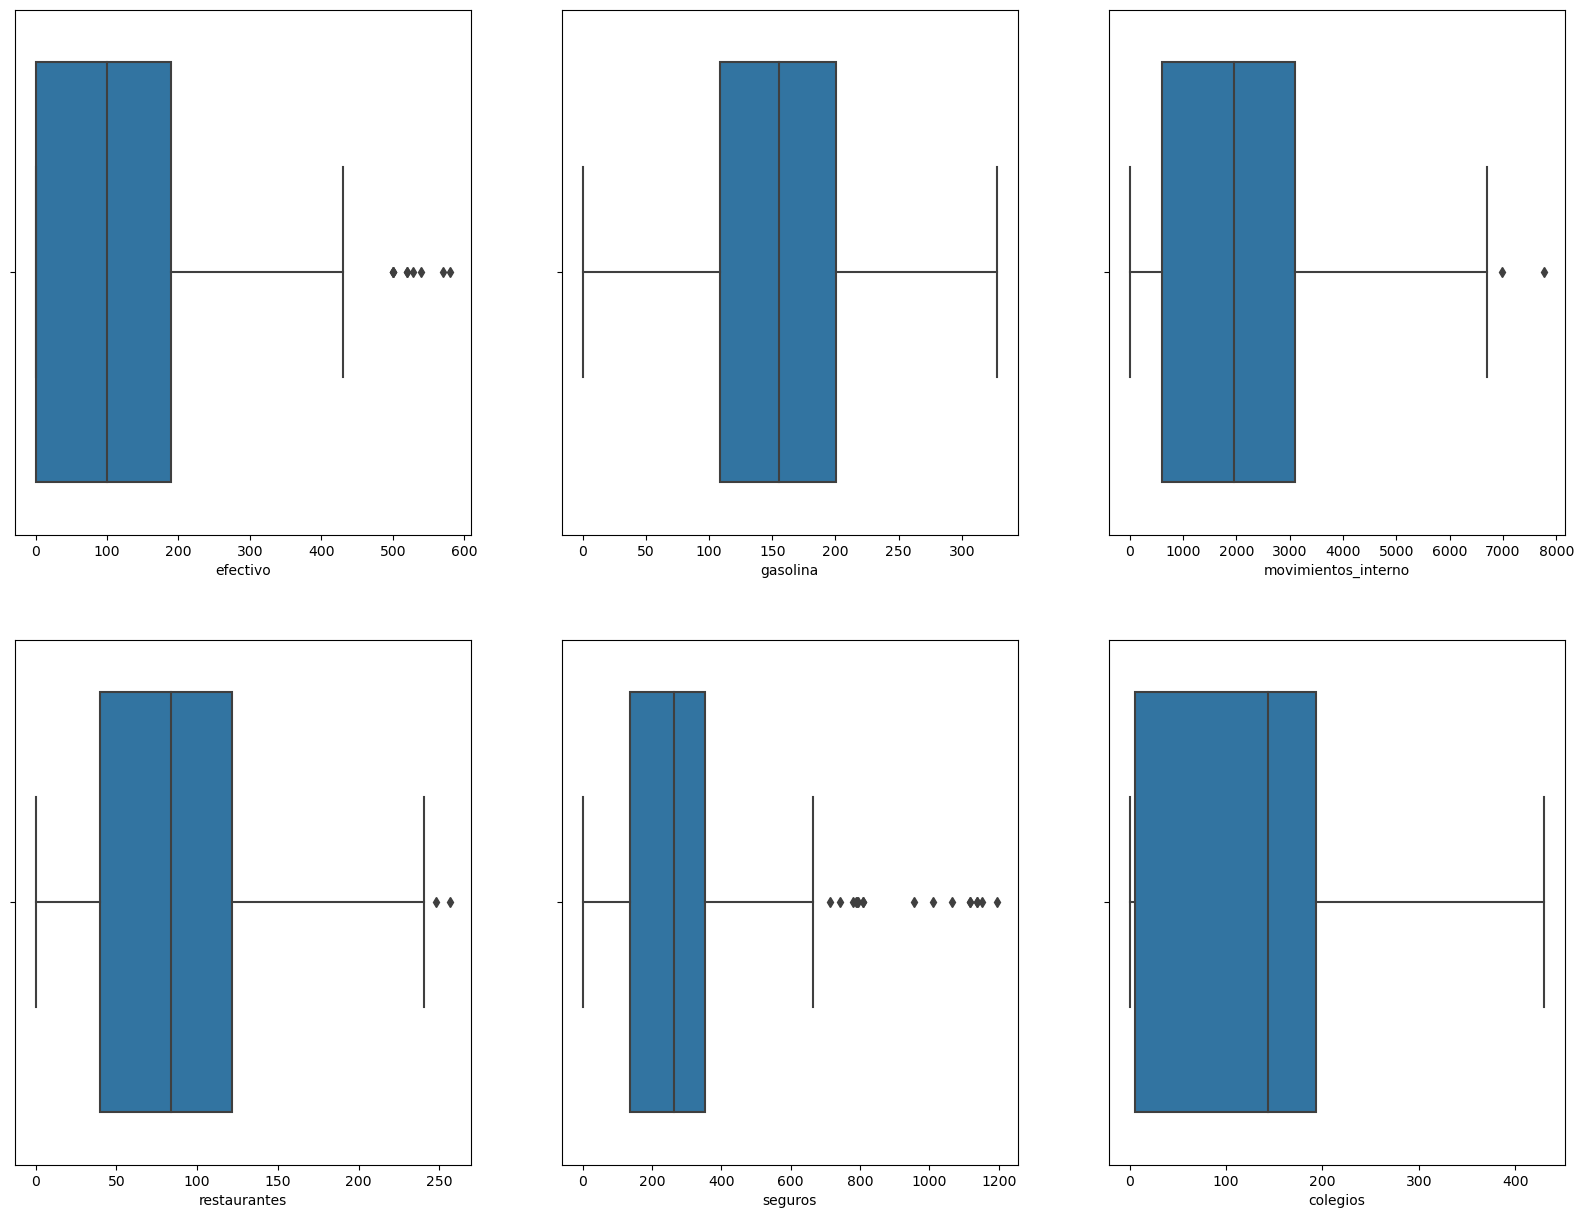

In [15]:
df_numericas2 = df.select_dtypes(include = np.number)

fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas2.columns):
    sns.boxplot(x=columna, data=df_numericas2, ax=axes[indice])
plt.show()

In [ ]:
df_numericas2

In [16]:
df['Mes'] = df.index
df = df.reset_index(drop=True)
df

,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,indefinido,...,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones,Total,Mes
0,20.0,68.43,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,78.43,Oct-2012
1,170.0,254.80,20.00,58.95,333.23,276.00,89.53,232.84,70.28,1740.80,...,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4028.89,Nov-2012
2,580.0,167.13,1400.00,0.00,83.42,0.00,89.53,626.23,0.00,129.55,...,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4001.76,Dec-2012
3,100.0,168.60,30.70,83.73,175.55,0.00,89.53,391.25,44.65,499.44,...,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3950.21,Jan-2013
4,80.0,232.84,676.60,83.55,562.75,0.00,89.53,313.01,111.20,100.00,...,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4047.95,Feb-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,80.0,265.69,2768.20,106.47,226.20,143.58,0.00,795.51,72.60,171.00,...,119.53,0.0,31.74,0.0,0.0,50.0,0.0,0.0,9964.94,Jun-2023
127,0.0,201.80,1748.95,165.20,272.33,278.47,0.00,534.93,72.01,1593.75,...,75.50,0.0,29.40,0.0,0.0,50.0,0.0,0.0,15641.48,Jul-2023
128,240.0,155.31,2462.05,120.98,359.02,0.00,0.00,689.54,72.48,264.48,...,119.53,0.0,0.00,0.0,0.0,50.0,0.0,0.0,13314.35,Aug-2023
129,570.0,175.68,5219.10,206.92,296.19,143.58,0.00,613.39,73.89,493.41,...,119.53,0.0,5.50,0.0,0.0,50.0,0.0,0.0,16884.15,Sep-2023


In [17]:
# Obtén el nombre de las columnas
columnas = df.columns.tolist()

# Reordena las columnas para que "Mes" sea la primera
columnas = ['Mes'] + [col for col in columnas if col != 'Mes']

# Reorganiza el DataFrame con las columnas en el nuevo orden
df = df[columnas]
df

,Mes,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,...,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones,Total
0,Oct-2012,20.0,68.43,10.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,78.43
1,Nov-2012,170.0,254.80,20.00,58.95,333.23,276.00,89.53,232.84,70.28,...,0.0,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4028.89
2,Dec-2012,580.0,167.13,1400.00,0.00,83.42,0.00,89.53,626.23,0.00,...,0.0,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4001.76
3,Jan-2013,100.0,168.60,30.70,83.73,175.55,0.00,89.53,391.25,44.65,...,0.0,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3950.21
4,Feb-2013,80.0,232.84,676.60,83.55,562.75,0.00,89.53,313.01,111.20,...,0.0,75.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4047.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Jun-2023,80.0,265.69,2768.20,106.47,226.20,143.58,0.00,795.51,72.60,...,0.0,119.53,0.0,31.74,0.0,0.0,50.0,0.0,0.0,9964.94
127,Jul-2023,0.0,201.80,1748.95,165.20,272.33,278.47,0.00,534.93,72.01,...,0.0,75.50,0.0,29.40,0.0,0.0,50.0,0.0,0.0,15641.48
128,Aug-2023,240.0,155.31,2462.05,120.98,359.02,0.00,0.00,689.54,72.48,...,0.0,119.53,0.0,0.00,0.0,0.0,50.0,0.0,0.0,13314.35
129,Sep-2023,570.0,175.68,5219.10,206.92,296.19,143.58,0.00,613.39,73.89,...,0.0,119.53,0.0,5.50,0.0,0.0,50.0,0.0,0.0,16884.15


In [18]:
df_numericas2.to_csv("limpio_sin_outliers.csv")